In [33]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('hiring.csv')
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [6]:
df['test_score(out of 10)'] = df['test_score(out of 10)'].fillna(df['test_score(out of 10)'].mean())
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.000000,9,50000
1,NaN,8.000000,6,45000
2,five,6.000000,7,60000
3,two,10.000000,10,65000
4,seven,9.000000,6,70000
5,three,7.000000,10,62000
6,ten,7.857143,7,72000
7,eleven,7.000000,8,80000


In [24]:
df.experience = df.experience.fillna('zero')
df.experience

0      zero
1      zero
2      five
3       two
4     seven
5     three
6       ten
7    eleven
Name: experience, dtype: object

In [7]:
from word2number import w2n

In [29]:
list2 = []
for i in df.experience:
    list2.append(w2n.word_to_num(i))
df.experience  = list2

ValueError: Type of input is not string! Please enter a valid number word (eg. 'two million twenty three thousand and forty nine')

In [30]:
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.000000,9,50000
1,0,8.000000,6,45000
2,5,6.000000,7,60000
3,2,10.000000,10,65000
4,7,9.000000,6,70000
5,3,7.000000,10,62000
6,10,7.857143,7,72000
7,11,7.000000,8,80000


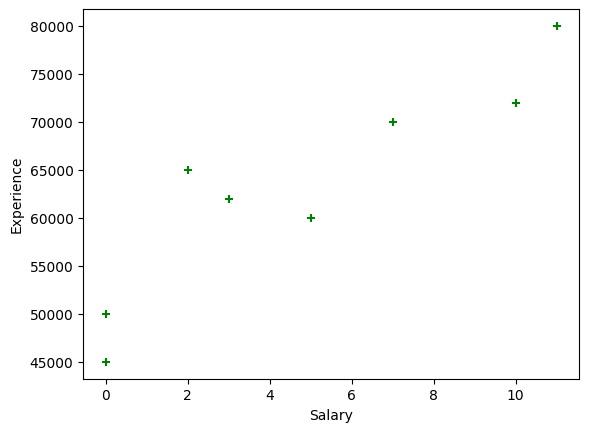

In [39]:
%matplotlib inline
plt.xlabel('Salary')
plt.ylabel('Experience')
plt.scatter(df['experience'], df['salary($)'], color = 'green', marker = '+')

In [31]:
from sklearn import linear_model

In [40]:
reg = linear_model.LinearRegression()
newdf = df.drop('salary($)', axis = 'columns')
newdf

,experience,test_score(out of 10),interview_score(out of 10)
0,0,8.000000,9
1,0,8.000000,6
2,5,6.000000,7
3,2,10.000000,10
4,7,9.000000,6
5,3,7.000000,10
6,10,7.857143,7
7,11,7.000000,8


In [44]:
reg.fit(newdf.values, df['salary($)'].values)

LinearRegression()

In [45]:
reg.predict([[11,7,8]])

array([79307.67351488])

In [46]:
reg.score(newdf.values, df['salary($)'].values)

0.9639958361860579